# 3.25 데이터 OA200, 대안동 비교

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from matplotlib import font_manager, rc

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams['font.size'] = 25

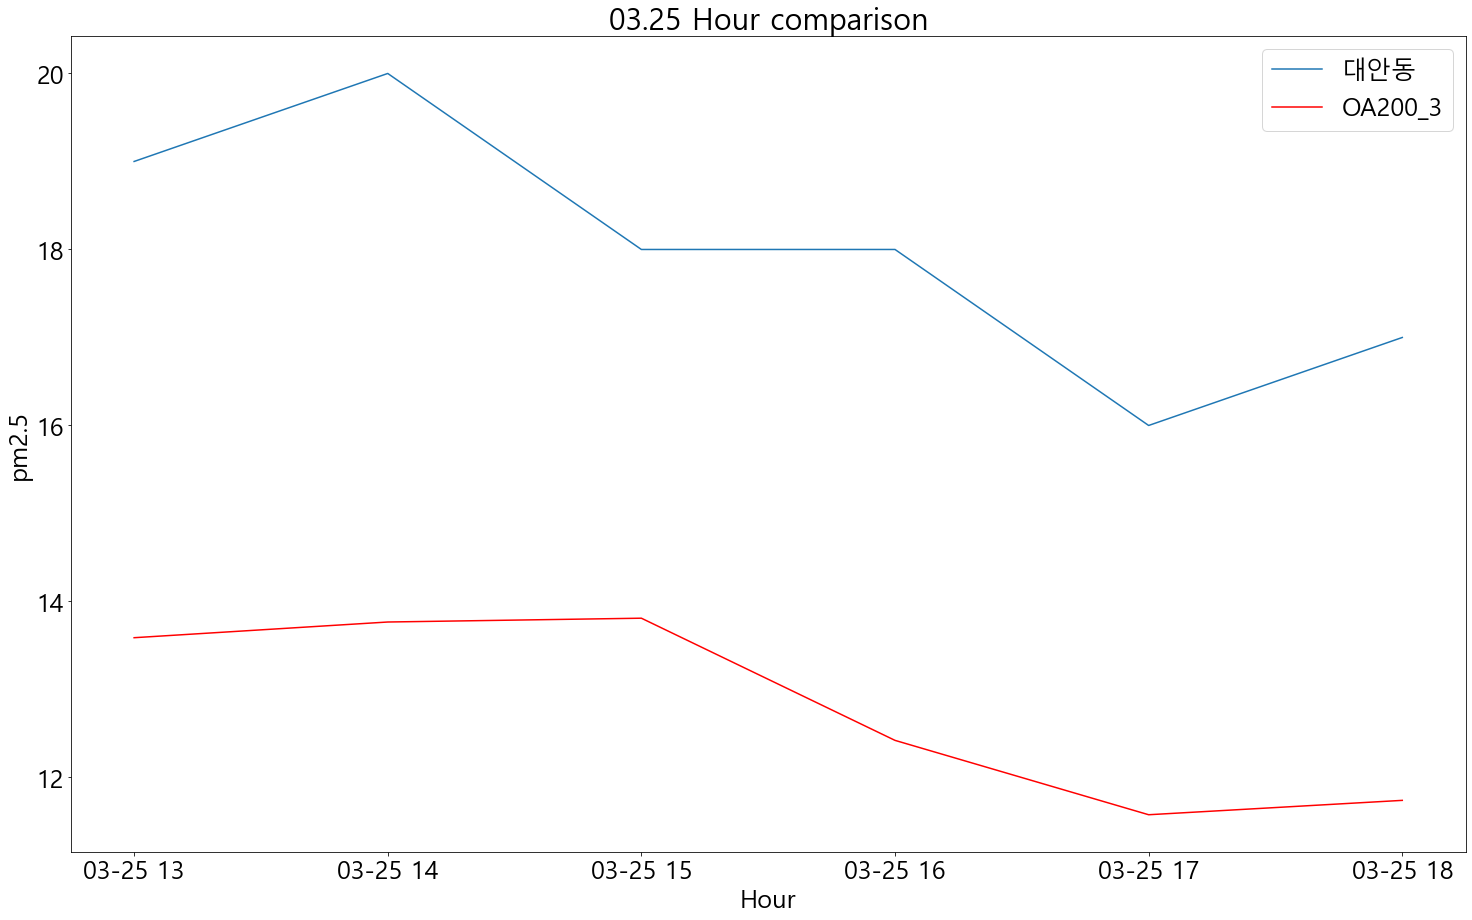

In [5]:
arim_data = pd.read_csv('./OA200_3/OA2003_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)


# 그래프 5개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25,arim_data_avg.index, arim_data_avg.pm25, '-r')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('대안동','OA200_3'))
plt.title('03.25 Hour comparison')
plt.show()

- 247.85m 거리의 차이가 있는 데이터
### 조건
- 대략 200m 차이의 거리 차이와, 습도가 엄청 높았다는 사실을 확인해보았을 때, 눈대중으로 보면 약 4~6ug/m^3 정도 차이가 날 것 같다.

### 차이 확인

date
2023-03-25 15:00:00    4.19
Freq: H, Name: pm25, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


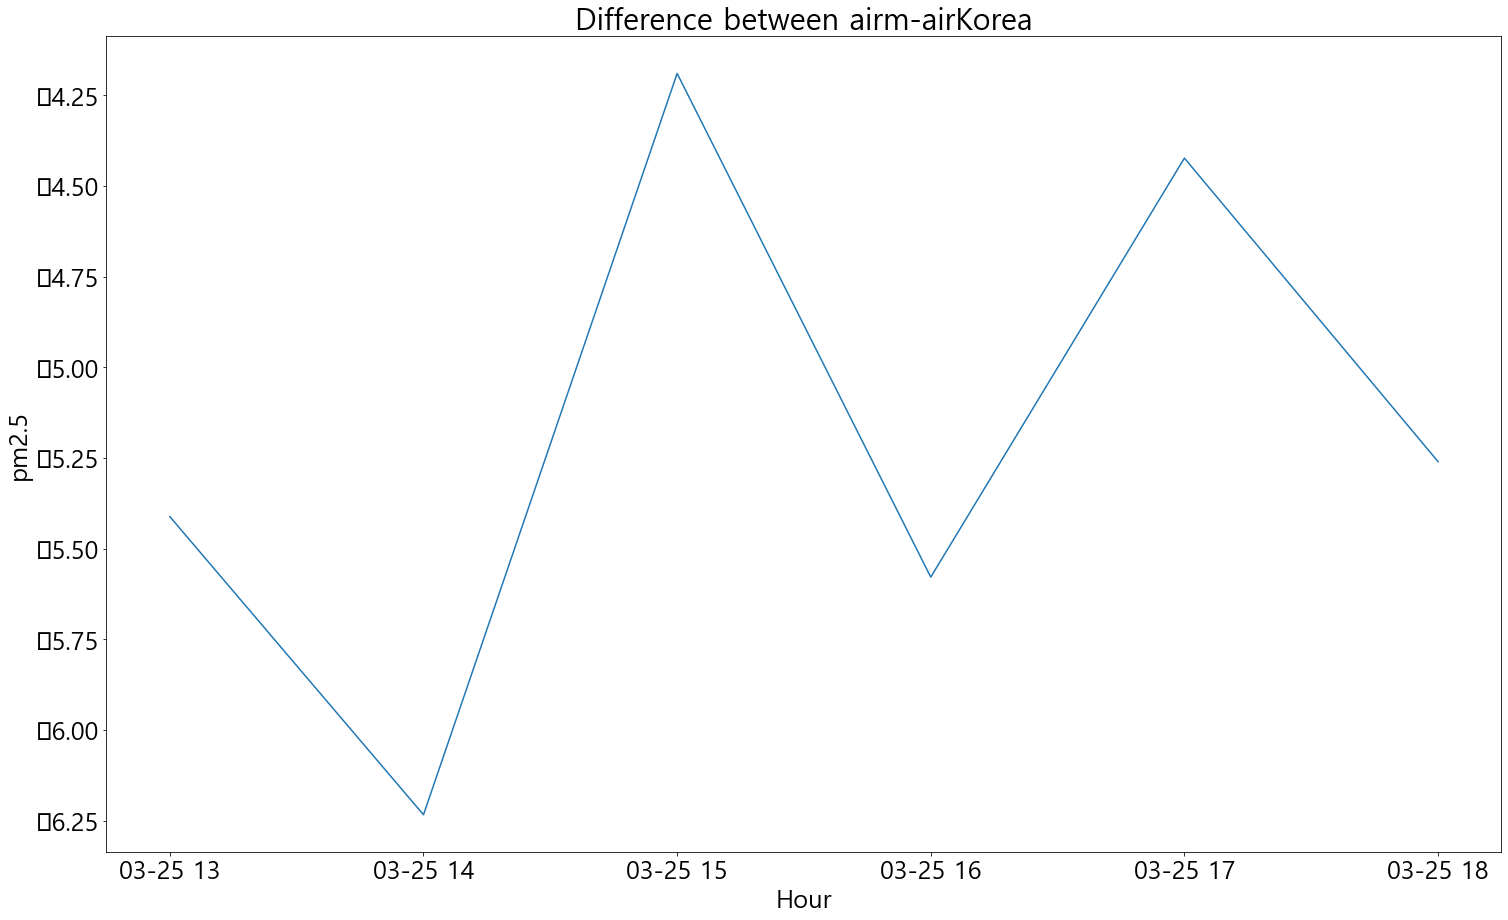

In [12]:
def find_max_value(data1, data2) :
    max_index = data1['pm25'].idxmax()
    arim = data1.loc[max_index, 'pm25'] # data1의 max값의 날짜에 맞는 pm25값
    arim_date = max_index # max_index값이 날짜로 설정되어 있으므로
    air = data2.loc[data2.index == arim_date] # data1와 같은 날짜 찾기
    return abs(air.pm25 - arim) # arim data와 air data의 pm25[max]값 차이

# arim_data 03.25 Hour
arim_data = pd.read_csv('./OA200_3/OA2003_03.25.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 03.25 Hour
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_03.25.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 3번 함수 사용
print(find_max_value(arim_data_avg, airKorea_data_avg))


#그래프 2개 비교 (차이 비교)
diff = np.subtract(arim_data_avg['pm25'], airKorea_data_avg['pm25'])
plt.plot(arim_data_avg.index,diff)
plt.title("Difference between airm-airKorea")
plt.xlabel("Hour")
plt.ylabel("pm2.5")
plt.show()